# Calendar data
Calendar data exploration, tag and will join back to listings


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#read calendar
path = '../../../data/new-york-city-airbnb-open-data/'
calendar_csv = os.path.join(path,'calendar.csv')

calendar = pd.read_csv(calendar_csv)

In [4]:
calendar.head(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,11943,2020-03-14,t,$150.00,$150.00,1,730
1,2060,2020-03-14,t,$100.00,$100.00,1,730
2,2060,2020-03-15,t,$100.00,$100.00,1,730
3,2060,2020-03-16,t,$100.00,$100.00,1,730
4,2060,2020-03-17,t,$100.00,$100.00,1,730
5,2060,2020-03-18,t,$100.00,$100.00,1,730
6,2060,2020-03-19,t,$100.00,$100.00,1,730
7,2060,2020-03-20,t,$100.00,$100.00,1,730
8,2060,2020-03-21,t,$100.00,$100.00,1,730
9,2060,2020-03-22,t,$100.00,$100.00,1,730


In [5]:
#shape
calendar.shape

(18540540, 7)

In [6]:
#find null columns
calendar.isna().sum()

listing_id           0
date                 0
available            0
price             1268
adjusted_price    1268
minimum_nights       0
maximum_nights       0
dtype: int64

In [12]:
filt = calendar['available'] == 'f'
calendar_false = calendar[filt]

In [13]:
#looks like true or false is useless
calendar_false['date'].max()

'2021-03-14'

In [14]:
calendar_false['date'].max()

'2021-03-14'

In [15]:
#drop null price records as they are only few
Drop_na = ['price']
calendar = calendar.dropna(subset=Drop_na)

In [17]:
#count unique calendar per listing, looks like all listings have 365 days
calendar.groupby('listing_id').agg({'date':'nunique'}).head()

,date
listing_id,
2060,365
2595,365
3831,365
5099,365
5114,365


# Currency conversion
This will remove dollars sign, comma and then convert to float

In [18]:
#function
def fix_currency(row):
    row = row.replace(',', '')
    row = row.replace('$', '')
    return row

In [19]:
colname = 'price'
calendar[colname] = calendar[colname].apply(lambda col: fix_currency(col)).astype(float)

In [27]:
#mean price per listing
calendar.groupby('listing_id').agg({'price':'min', 'date': 'min'}).head()

,price,date
listing_id,,
2060,10.0,2020-03-14
2595,175.0,2020-03-14
3831,80.0,2020-03-14
5099,200.0,2020-03-14
5114,94.0,2020-03-14


In [29]:
filt = (calendar['listing_id'] == 2060) & (calendar['price'] == 10)
calendar[filt]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
235,2060,2020-11-03,t,10.0,$10.00,1,730


In [6]:
calendar['price'].mean()

158.1586515910657

In [12]:
calendar['price'].min()

0.0

In [13]:
calendar['price'].max()

10000.0

In [30]:
#strange, why 0 dollar?, looks only around 1000 records, remove
filt = calendar['price']> 0
calendar = calendar[filt]

In [31]:
calendar.shape

(18538164, 7)

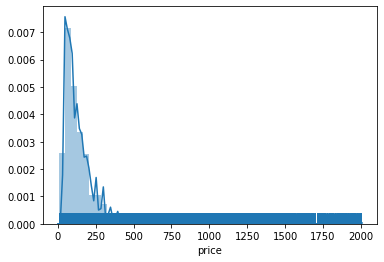

In [32]:
#graph price (based on listings price analysis)
filt = (calendar['price'] < 2000)
sns.distplot(calendar['price'][filt], rug=True)

In [33]:
calendar.shape

(18538164, 7)

In [34]:
#read US holiday data
path = '../../data/new-york-city-airbnb-open-data/'
us_holiday_csv = os.path.join(path,'usholidays.csv')

us_holiday = pd.read_csv(us_holiday_csv)

In [35]:
us_holiday.head()

,Unnamed: 0,Date,Holiday
0,0,2010-12-31,New Year's Day
1,1,2011-01-17,"Birthday of Martin Luther King, Jr."
2,2,2011-02-21,Washington's Birthday
3,3,2011-05-30,Memorial Day
4,4,2011-07-04,Independence Day


In [36]:
#drop column and rename for join later
us_holiday.drop(columns='Unnamed: 0', inplace = True)
us_holiday.rename(columns={'Date':'date'}, inplace=True)

In [37]:
calendar_w_holidays = pd.merge(calendar, us_holiday, how='left', on=['date'])
calendar_w_holidays.shape

(18538164, 8)

In [38]:
calendar_w_holidays.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,Holiday
0,11943,2020-03-14,t,150.0,$150.00,1,730,NaN
1,2060,2020-03-14,t,100.0,$100.00,1,730,NaN
2,2060,2020-03-15,t,100.0,$100.00,1,730,NaN
3,2060,2020-03-16,t,100.0,$100.00,1,730,NaN
4,2060,2020-03-17,t,100.0,$100.00,1,730,NaN


In [39]:
#drop unused colmuns
Unused_columns = ['adjusted_price', 'minimum_nights', 'maximum_nights']
calendar_w_holidays.drop(columns=Unused_columns, inplace = True)

In [40]:
calendar_w_holidays.head()

,listing_id,date,available,price,Holiday
0,11943,2020-03-14,t,150.0,NaN
1,2060,2020-03-14,t,100.0,NaN
2,2060,2020-03-15,t,100.0,NaN
3,2060,2020-03-16,t,100.0,NaN
4,2060,2020-03-17,t,100.0,NaN


In [41]:
#look at how many price each listings have
listing_price = calendar.groupby('listing_id').agg({'price':'nunique'}).sort_values(by=['price'], ascending=False)

In [42]:
#number of different prices per listing
listing_price.head()

,price
listing_id,
37926696,321
40628713,306
42321518,302
40247206,293
37279744,289


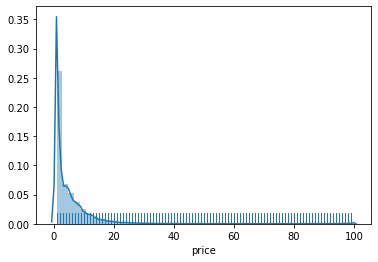

In [43]:
#looking at listing that have under 100 different prices only
filt = listing_price['price'] < 100
sns.distplot(listing_price['price'][filt], rug=True)

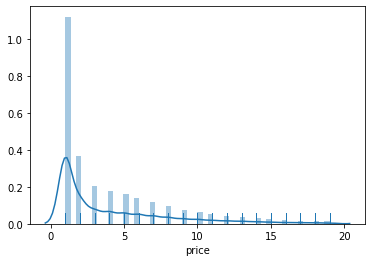

In [44]:
#looking at the chart, looks like most have under 20 prices, redraw for under 20
filt = listing_price['price'] < 20
sns.distplot(listing_price['price'][filt], rug=True)

In [45]:
#number of listings that have 20 diff prices or less, looks like a majority of them
filt = listing_price['price'] < 20
listing_price[filt].head()

,price
listing_id,
36312602,19
40651757,19
38620656,19
16202962,19
29646454,19


In [50]:
#look at one that has lots of prices
filt = (calendar_w_holidays['listing_id'] == 36312602) & (calendar_w_holidays['Holiday'].notnull())
calendar_w_holidays[filt]

,listing_id,date,available,price,Holiday
14488895,36312602,2020-05-25,f,22.0,Memorial Day
14488978,36312602,2020-07-03,f,19.0,Independence Day
14489044,36312602,2020-09-07,f,40.0,Labor Day
14489079,36312602,2020-10-12,f,59.0,Columbus Day
14489109,36312602,2020-11-11,f,59.0,Veterans Day
14489124,36312602,2020-11-26,f,61.0,Thanksgiving Day
14489153,36312602,2020-12-25,f,63.0,Christmas Day


In [51]:
#look at one that has lots of prices around 2020-09-07
filt = (calendar_w_holidays['listing_id'] == 36312602) & (calendar_w_holidays['date'] > '2020-10-01')&(calendar_w_holidays['date']<'2020-10-20')
calendar_w_holidays[filt]

,listing_id,date,available,price,Holiday
14489069,36312602,2020-10-02,f,63.0,NaN
14489070,36312602,2020-10-03,f,64.0,NaN
14489071,36312602,2020-10-04,f,60.0,NaN
14489072,36312602,2020-10-05,f,59.0,NaN
14489073,36312602,2020-10-06,f,59.0,NaN
14489074,36312602,2020-10-07,f,59.0,NaN
14489075,36312602,2020-10-08,f,61.0,NaN
14489076,36312602,2020-10-09,f,63.0,NaN
14489077,36312602,2020-10-10,f,64.0,NaN
14489078,36312602,2020-10-11,f,60.0,NaN


In [58]:
filt = (calendar_w_holidays['listing_id'] == 16202962)
calendar_w_holidays['price'][filt].min()

50.0

In [59]:
calendar_w_holidays['price'][filt].mean()

118.56438356164384

In [60]:
calendar_w_holidays['price'][filt].max()

130.0

In [63]:
filt_dt = calendar_w_holidays['price'] == 120
calendar_w_holidays[filt][filt_dt].head(1)

,listing_id,date,available,price,Holiday
6569728,16202962,2020-06-14,t,120.0,NaN
